# Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

# Classs:

In [2]:
class JuliaSet:
    """
    the class to create julia sets
    methods:
        f:
        the mathematical function of the julia set

        createPoints:
        the function to create points of the set

        run:
        the function to calculate the scape numbers

        show:
        the function to show the result

    """

    def __init__(self, resolution: int, depth: int, c: np.complex_) -> None:
        """
        the  function to create the fractal object

        :param resolution: the count of pixels between 0,1
        :type resolution: int
        :param depth:
        :type depth:
        :param c: the complex number in sets' mathematical function
        :type c: np.complex_
        """
        self.resolution = resolution
        self.depth = depth
        self.c = c
        self.data = np.zeros((resolution+1,resolution+1))
        self.size = int(resolution/2)
        self.points = self.createPoints()

    def f(self, z: np.complex_) -> np.complex_:
        """
        the mathematical function of the julia set

        :param z: the input complex number
        :type z: np.complex_
        :return: the output complex number
        :rtype: np.complex_
        """
        return z**2 + self.c

    def createPoints(self) -> np.ndarray:
        """
        the function to create points of the set
        (1/0.65) larger

        :return:the points of the set
        :rtype: np.ndarray
        """
        points = []
        a = np.array(range(-self.size,self.size+1)) / (0.65*self.size)
        for i in range(-self.size,self.size+1):
            points.append(a+i*1j/(0.65*self.size))

        return np.array(points)


    def run(self) -> None:
        """
        the function to calculate the scape numbers
        """
        for _ in range(self.depth):
            self.points = self.f(self.points)
            self.data += np.ones((self.resolution+1,self.resolution+1))*((np.imag(self.points)**2 + np.real(self.points)**2)<1)

    def show(self, x: object) -> None:
        """
        the function to show the result

        :param x: thr colormap used to show the result
        :type x: matplotlib.colors.ListedColormap
        """
        plt.figure(figsize=(10,10))
        plt.imshow(self.data[:][::-1],cmap=x)


### c params:

In [3]:
c1 = -0.4 - 0.6j
c2 = -1j
c3 = -0.12 -0.75j
c4 = -0.6
c5 = -0.8 + 0.16j
c6 = -0.4 + 0.6j
cs = [c1,c2,c3,c4,c5,c6]

### main loop:

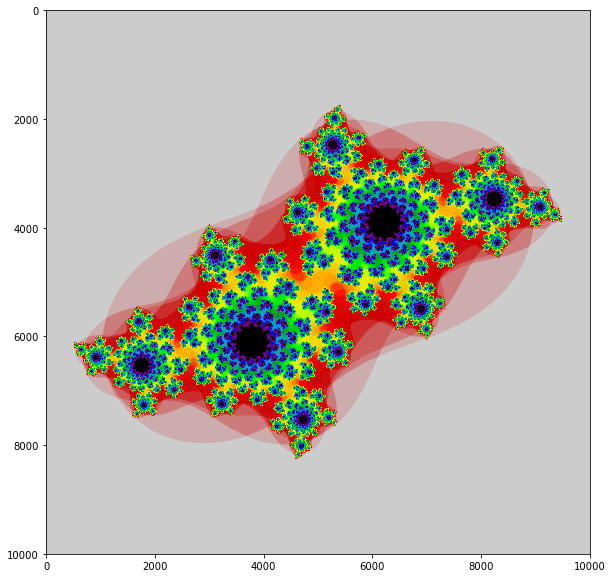

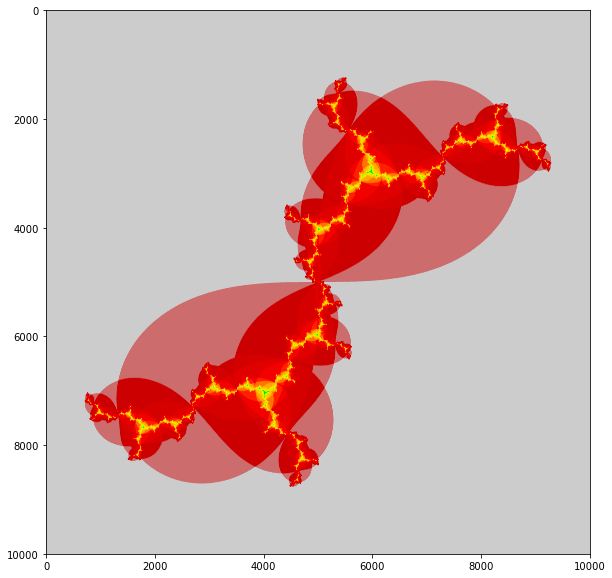

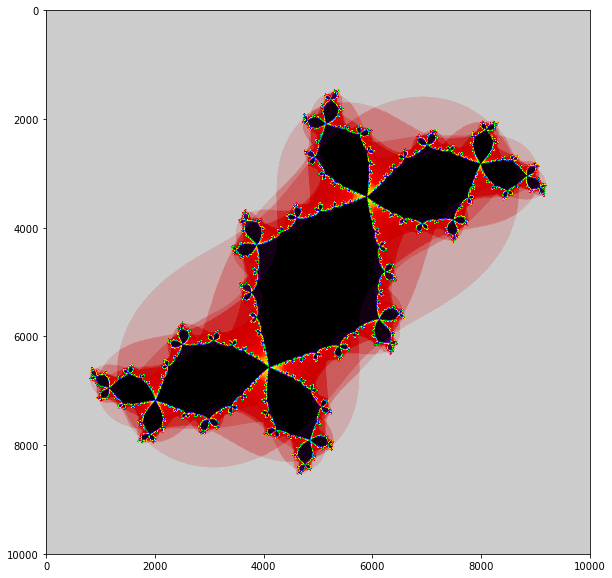

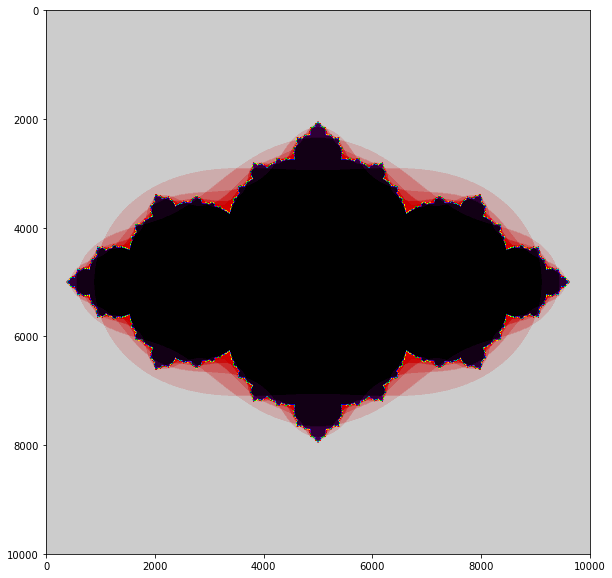

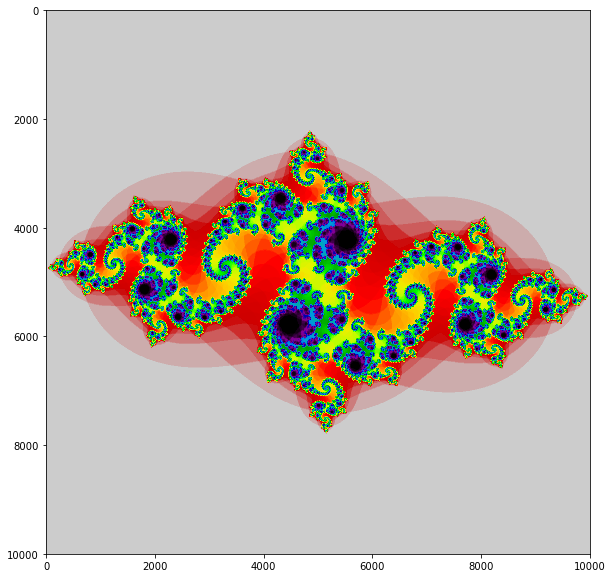

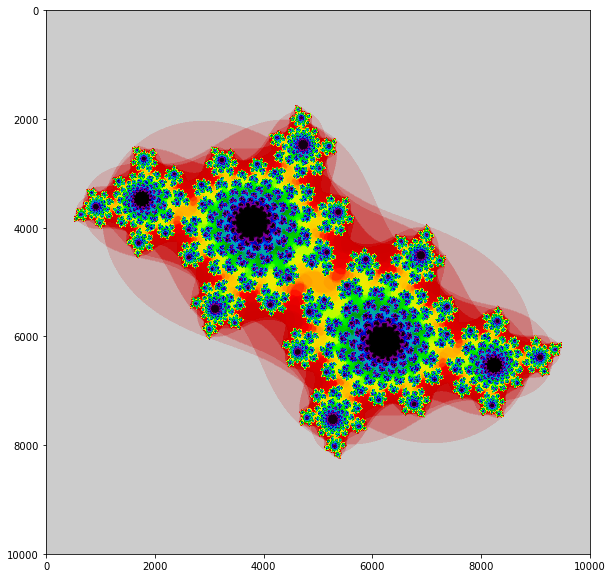

In [4]:
for c in cs:
    juliaSet = JuliaSet(10000,100,c)
    juliaSet.run()
    juliaSet.show(cm.nipy_spectral_r)
    del juliaSet